In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import entropy
import numpy as np 

### Characterization of database

In [2]:
# Data with only columns of interest
data = pd.read_csv('Data/dataEchoChambers.csv', usecols=['tw_id', 'fecha', 'usr_id', 'opinion_dinamic', 'url_expanded', 'medio'])

In [3]:
# Head
data.head(n = 5)

,fecha,url_expanded,medio,opinion_dinamic,tw_id,usr_id
0,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101346910135377920,716295311342321665
1,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101346845589233665,271519704
2,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101350580142903296,987494618156675072
3,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101350441126936580,770375532
4,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101353444135370754,740350122974937088


In [4]:
# Number of times that an user share an url
print(f'Number of sharing events = {data.shape[0]}')

Number of sharing events = 1037812


In [5]:
print(f"Number of unique news = {data.drop_duplicates(subset=['url_expanded']).shape[0]}")

Number of unique news = 67369


In [6]:
print(f"Number of unique users = {data.drop_duplicates(subset=['usr_id']).shape[0]}")

Number of unique users = 124015


In [7]:
print(f"Number of unique media outlet = {data.drop_duplicates(subset=['medio']).shape[0]}")

Number of unique media outlet = 19


### Some plots

In [8]:
# Distribution of unique news
dist_unique_news = data.drop_duplicates(subset='url_expanded').groupby('medio').count()['url_expanded'].sort_values(ascending = False)

In [9]:
# Effective number of media 
effective_number_of_media = np.round(2**entropy(dist_unique_news.tolist(), base = 2))
print(effective_number_of_media)

14.0


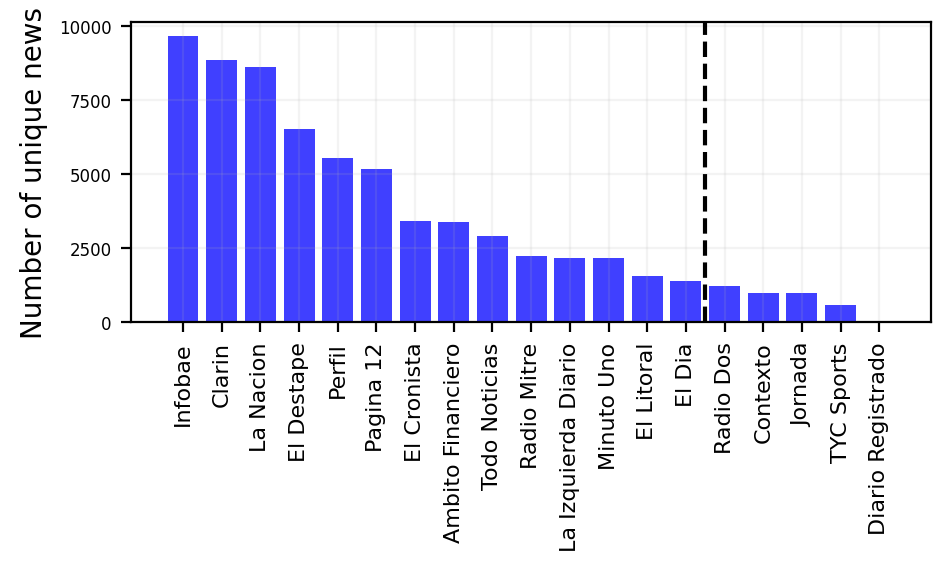

In [10]:
plt.figure(dpi = 200, figsize=(5,3))
plt.axes([0.15, 0.45, 0.80, 0.50])
plt.bar(range(dist_unique_news.shape[0]), dist_unique_news.to_list(), color = 'b', alpha = 0.75)
plt.xticks(range(dist_unique_news.shape[0]), dist_unique_news.index, rotation = 90, size = 8)
plt.axvline(effective_number_of_media - 0.5, color = 'k', linestyle = '--')
plt.yticks(size = 6)
plt.ylabel('Number of unique news', size = 10)
plt.grid(True, alpha = 0.15)
plt.savefig('Results/Distribution_unique_news.pdf')
plt.savefig('Results/Distribution_unique_news.png')
plt.show()

In [11]:
# Distribution of sharing news
dist_sharing_news = data.groupby('medio').count()['url_expanded'].sort_values(ascending = False)

In [12]:
# Effective number of media 
effective_number_of_media = np.round(2**entropy(dist_sharing_news.tolist(), base = 2))
print(effective_number_of_media)

9.0


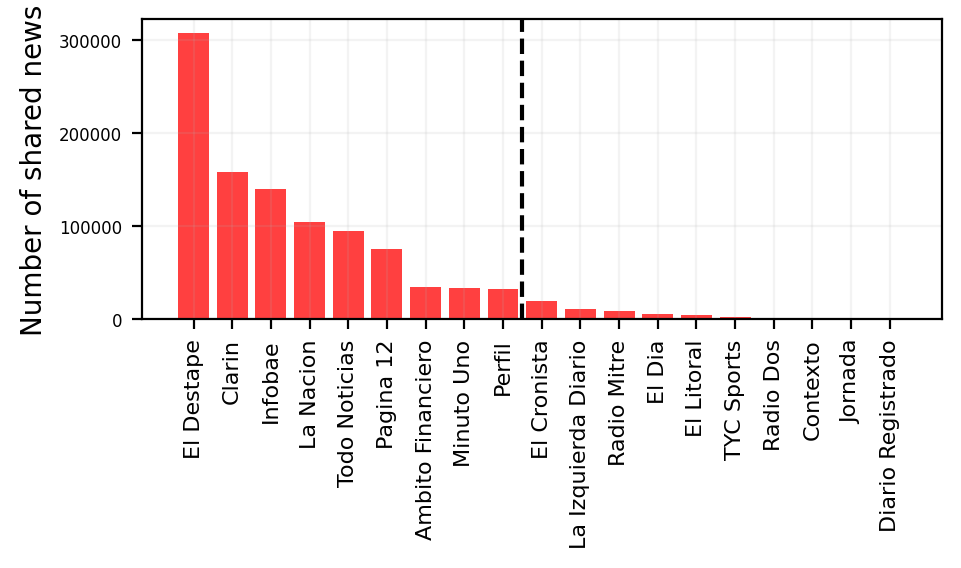

In [13]:
plt.figure(dpi = 200, figsize=(5,3))
plt.axes([0.15, 0.45, 0.80, 0.50])
plt.bar(range(dist_sharing_news.shape[0]), dist_sharing_news.to_list(), color = 'r', alpha = 0.75)
plt.xticks(range(dist_sharing_news.shape[0]), dist_sharing_news.index, rotation = 90, size = 8)
plt.axvline(effective_number_of_media - 0.5, color = 'k', linestyle = '--')
plt.yticks(size = 6)
plt.ylabel('Number of shared news')
plt.savefig('Results/Distribution_sharing_news.pdf')
plt.savefig('Results/Distribution_sharing_news.png')
plt.grid(True, alpha = 0.15)
plt.show()

### All in one figure 

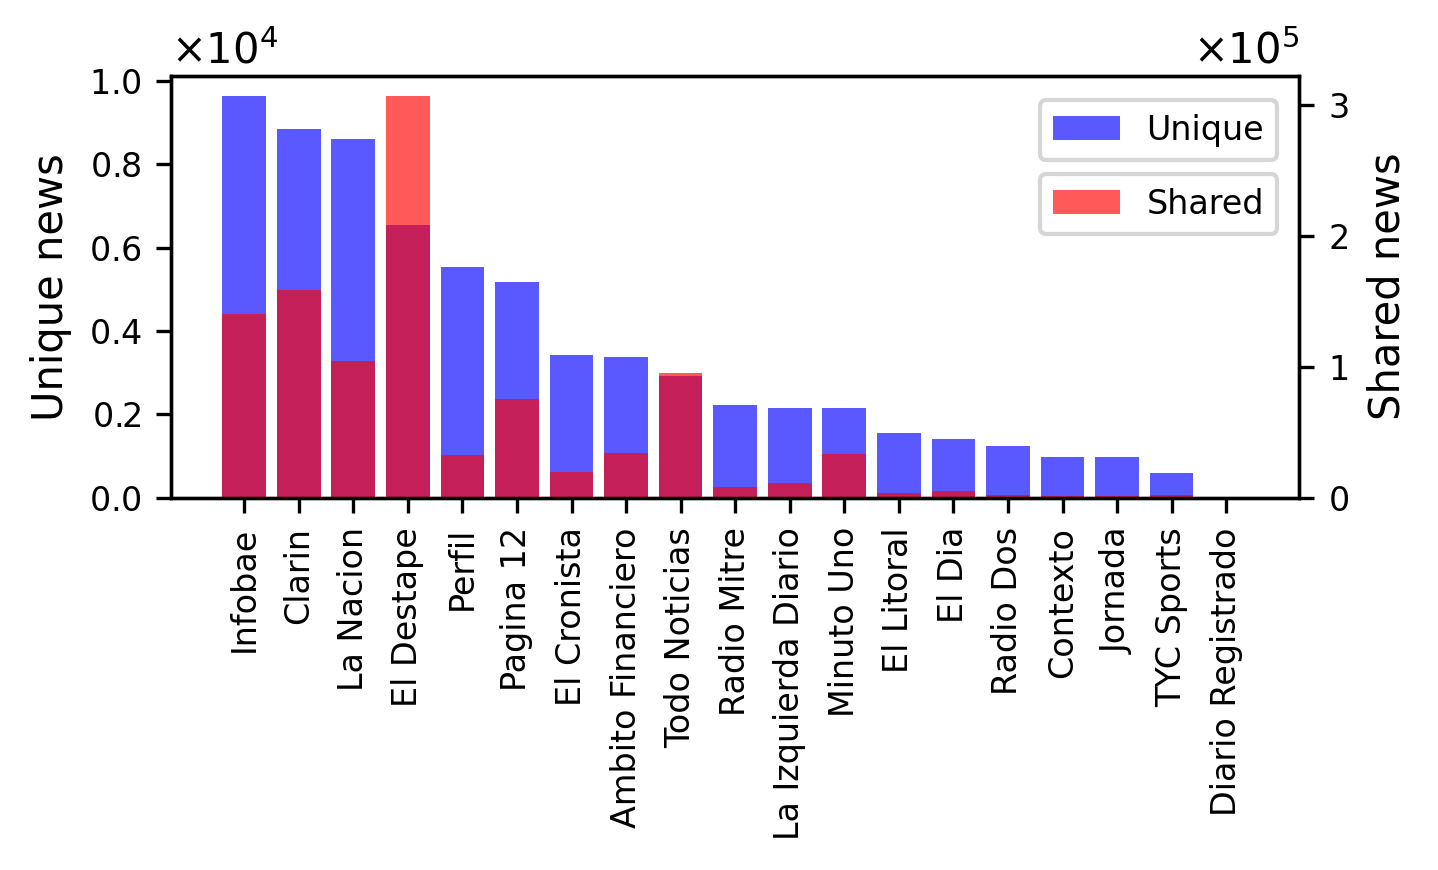

In [95]:
fig, ax1 = plt.subplots(figsize = (5,3), dpi = 300)

ax1.bar(range(dist_unique_news.shape[0]), dist_unique_news.to_list(), color = 'b', alpha = 0.65, label = 'Unique')
ax2 = ax1.twinx()
ax2.bar(range(dist_sharing_news.shape[0]), dist_sharing_news[dist_unique_news.index].to_list(), color = 'r', alpha = 0.65, label = 'Shared')
ax1.set_xticks(range(dist_unique_news.shape[0]), dist_unique_news.index, rotation = 90, size = 8)

ax1.set_ylabel('Unique news', size = 10, color = 'k')
ax2.set_ylabel('Shared news', size = 10, color = 'k')
ax2.tick_params(axis='y', labelcolor = 'k', labelsize = 8)
ax2.ticklabel_format(axis = 'y', style='sci', scilimits=(0, 1), useMathText=True, useOffset=False)
ax1.ticklabel_format(axis = 'y', style='sci', scilimits=(0, 1), useMathText=True, useOffset=False)
ax1.tick_params(axis='y', labelcolor = 'k', labelsize = 8)
ax1.legend(loc = [0.77, 0.80], fontsize = 8)
ax2.legend(loc = [0.77, 0.625], fontsize = 8)
fig.tight_layout()
plt.savefig('Results/Distribution_news.pdf')
plt.savefig('Results/Distribution_news.png')
plt.show()